### A famous shopping mall has hired you as a ML engineer. Your task is to create a model that can predict whether the customer will purchase the product from the website or not based on his/her age and estimated salary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')

In [3]:
#Check for missing data and understand the datatype for each column
data.info()
#No missing data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null object
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int64(4), object(1)
memory usage: 15.7+ KB


In [4]:
#Features --- age,estimated salary (numeric)
#Label ------ Purchased (numeric)(binary)
#Lets confirm whether its binary class label or multiclass label
data.Purchased.unique()
#Since there exists only two values, therefore this is binary class label
#Therefore we can use LogisticRegression

array([0, 1], dtype=int64)

In [17]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [5]:
#Classification
# Features ---- 2d array
# Label ------- 1d array
#This is the requirement from SKLEARN

features = data.iloc[:,[2,3]].values
label = data.iloc[:,4].values

In [9]:
#Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(features,
                                                label,
                                                test_size=0.2,
                                                random_state =10)

In [78]:
#Create model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.640625
0.65


In [80]:
model.intercept_

array([-0.00131729])

In [81]:
model.coef_

array([[-3.47799543e-03, -1.18193842e-06]])

In [82]:
#label
model.predict(np.array([[23,87654]]))

array([0], dtype=int64)

In [83]:
#Probability
model.predict_proba(np.array([[23,87654]]))

array([[0.54609693, 0.45390307]])

In [85]:
#Your DataScientist says any entity getting probability of greater than 0.4 ----> label - 1
# You have a privilege to decide the threshold !!!
# 0 to 0.4 ----> 0
# 0.4 to 1 ----> 1

In [86]:
y_predicted_test = model.predict_proba(X_test)
y_predicted_test[0:5]

array([[0.55582111, 0.44417889],
       [0.55327717, 0.44672283],
       [0.56310361, 0.43689639],
       [0.55486178, 0.44513822],
       [0.53445636, 0.46554364]])

In [87]:
y_final_pred = np.where(model.predict_proba(X_test)[:,1] > 0.4, 1, 0) #Conditional Statement in np
y_final_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
#Applying K-NN Assuming k = 3
from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=7,
                             metric='minkowski',
                             p = 2)
model2.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [16]:
?KNeighborsClassifier

In [15]:
print(model2.score(X_train,y_train))
print(model2.score(X_test,y_test))

0.84375
0.875


In [90]:
#Confusion Matrix for SocialNetworkAds
# LogisticRegression
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,model.predict(X_test))
cm

array([[52,  0],
       [28,  0]], dtype=int64)

In [91]:
data.Purchased.unique()

array([0, 1], dtype=int64)

In [92]:
data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [93]:
(257)/(257+143)

0.6425

In [94]:
(143) / (257+143)

0.3575

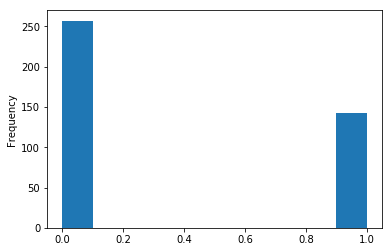

In [95]:
#So dont go for Accuracy !!!!
data.Purchased.plot.hist()

In [99]:
from sklearn.metrics import classification_report

In [100]:
print(classification_report(y_test,model.predict(X_test))) #logisticRegression

             precision    recall  f1-score   support

          0       0.65      1.00      0.79        52
          1       0.00      0.00      0.00        28

avg / total       0.42      0.65      0.51        80



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
print(classification_report(y_test,model2.predict(X_test)))#K-NN

             precision    recall  f1-score   support

          0       0.89      0.92      0.91        52
          1       0.85      0.79      0.81        28

avg / total       0.87      0.88      0.87        80



In [104]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,model2.predict(X_test)))
print(accuracy_score(y_test,model.predict(X_test)))

0.875
0.65


In [ ]:
#Accuracy of above 65% --- Accept !!!! (Balanced Data ---> Accuracy Score)
# (Unbalanced data -- Check either precision or recall has the value greater than accepatble value)

In [105]:
from sklearn.tree import DecisionTreeClassifier
modelClassifier = DecisionTreeClassifier()
modelClassifier.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [106]:
modelClassifier.score(X_train,y_train)

0.99375

In [107]:
modelClassifier.score(X_test,y_test)

0.8625

In [108]:
from sklearn.ensemble import RandomForestClassifier
modelRandomF = RandomForestClassifier()
modelRandomF.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [109]:
modelRandomF.score(X_train,y_train)

0.984375

In [110]:
modelRandomF.score(X_test,y_test)

0.8875